### 2.6.1. 基本概率论

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

c:\Users\yy200\miniconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 0., 2., 3., 3.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1520, 0.1710, 0.1710, 0.1670, 0.1870, 0.1520])

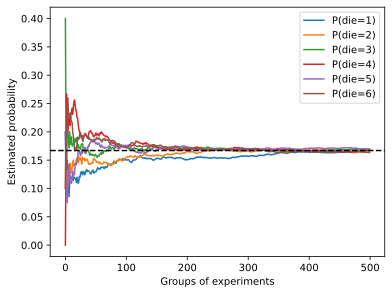

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### 2.6.2 处理多个随机变量

贝叶斯定理:
$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$  
边际化:
$P(B) = \sum_{A} P(A, B)$  
随机性判据:
$P(A, B) = P(A)P(B)$ , $P(A, B \mid C) = P(A \mid C)P(B \mid C)$  

### 2.6.3 期望和方差
期望: $E[X] = \sum_{x} x P(X = x).$  
$f(x)$期望: $E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$  
方差: $\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$  
$f(x)$方差: $\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$

### Practice

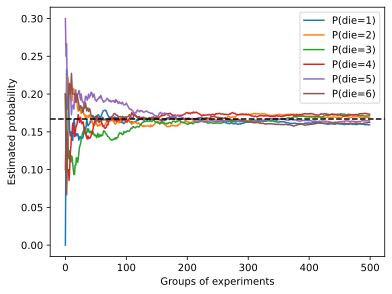

In [15]:
# 1
m = 500
n = 10
counts = multinomial.Multinomial(n, fair_probs).sample((m,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();